# Ensemble Techniques

1. Can we use Bagging for regression problems?
   Yes, Bagging can be used for regression problems using models like BaggingRegressor.

2. What is the difference between multiple model training and single model training?
   Multiple model training uses an ensemble of models to improve accuracy and robustness, while single model training relies on one model, which may overfit or underperform.

3. Explain the concept of feature randomness in Random Forest.
   At each split in a Random Forest tree, a random subset of features is considered, introducing diversity and reducing correlation among trees.

4. What is OOB (Out-of-Bag) Score?
   It’s an internal validation method where each tree is evaluated on samples not used during its training (out-of-bag samples), providing an unbiased estimate of model performance.

5. How can you measure the importance of features in a Random Forest model?
   By calculating the decrease in impurity (Gini or entropy) or using permutation importance across all trees in the forest.

6. Explain the working principle of a Bagging Classifier.
   It trains multiple models on different bootstrapped subsets of data and combines their predictions (e.g., majority vote for classification).

7. How do you evaluate a Bagging Classifier’s performance?
   Use metrics like accuracy, precision, recall, F1-score, or ROC-AUC on a test or validation dataset.

8. How does a Bagging Regressor work?
   It fits multiple regressors on bootstrapped samples and averages their predictions for a final output.

9. What is the main advantage of ensemble techniques?
   Improved performance, generalization, and robustness compared to individual models.

10. What is the main challenge of ensemble methods?
    Increased computational cost and complexity in training and interpretation.

11. Explain the key idea behind ensemble techniques.
    Combine multiple weak or base models to create a strong, more accurate model.

12. What is a Random Forest Classifier?
    An ensemble model that uses bagging with decision trees and feature randomness to perform classification tasks.

13. What are the main types of ensemble techniques?
    Bagging, Boosting, Stacking, and Voting.

14. What is ensemble learning in machine learning?
    A technique where multiple models are combined to solve a problem, often leading to better accuracy and stability.

15. When should we avoid using ensemble methods?
    When interpretability is crucial or when computational resources are limited.

16. How does Bagging help in reducing overfitting?
    By averaging predictions over multiple diverse models, it reduces model variance and hence overfitting.

17. Why is Random Forest better than a single Decision Tree?
    It reduces overfitting and improves accuracy by aggregating multiple diverse decision trees.

18. What is the role of bootstrap sampling in Bagging?
    To create diverse training subsets by sampling with replacement, leading to less correlated base models.

19. What are some real-world applications of ensemble techniques?
    Fraud detection, spam filtering, medical diagnosis, credit scoring, and recommendation systems.

20. What is the difference between Bagging and Boosting?
    Bagging builds models independently in parallel to reduce variance, while Boosting builds them sequentially to reduce bias by focusing on previous errors.

### partical

In [8]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier with Decision Trees: {accuracy:.4f}")


Accuracy of Bagging Classifier with Decision Trees: 1.0000


In [10]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Regressor
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE of Bagging Regressor with Decision Trees: {mse:.2f}")


MSE of Bagging Regressor with Decision Trees: 3056.49


In [12]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Print feature importance
importances = rf_clf.feature_importances_
for feature, score in zip(load_breast_cancer().feature_names, importances):
    print(f"{feature}: {score:.4f}")


mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052


In [16]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)

rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)

rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))

print(f"Random Forest Regressor MSE: {rf_mse:.2f}")
print(f"Decision Tree Regressor MSE: {dt_mse:.2f}")


Random Forest Regressor MSE: 0.03
Decision Tree Regressor MSE: 0.05


In [18]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)

print(f"OOB Score: {rf_oob.oob_score_:.4f}")


OOB Score: 0.9560


In [24]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC(probability=True)
bagging_svm = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, bagging_svm.predict(X_test))
print(f"Accuracy of Bagging Classifier with SVM: {accuracy:.4f}")


Accuracy of Bagging Classifier with SVM: 0.9474


In [28]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.svm import SVC

svm = SVC(probability=True)
bagging_svm = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, bagging_svm.predict(X_test))
print(f"Accuracy of Bagging Classifier with SVM: {accuracy:.4f}")


Accuracy of Bagging Classifier with SVM: 0.9474


In [30]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

for n in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"n_estimators={n}, Accuracy={acc:.4f}")


n_estimators=10, Accuracy=0.9561
n_estimators=50, Accuracy=0.9649
n_estimators=100, Accuracy=0.9649
n_estimators=200, Accuracy=0.9649


In [34]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_bin = X_train[:, :10]  # For binary classification with fewer features
y_bin = (y_train == y_train.max()).astype(int)
X_test_bin = X_test[:, :10]
y_test_bin = (y_test == y_test.max()).astype(int)

bagging_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bagging_lr.fit(X_bin, y_bin)
y_proba = bagging_lr.predict_proba(X_test_bin)[:, 1]
auc = roc_auc_score(y_test_bin, y_proba)
print(f"AUC Score (Bagging + Logistic Regression): {auc:.4f}")


AUC Score (Bagging + Logistic Regression): 0.9885


In [36]:
# 29. Train a Random Forest Regressor and analyze feature importance scores.

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

importances = rf_reg.feature_importances_
for i, score in enumerate(importances):
    print(f"Feature {i}: Importance = {score:.4f}")


Feature 0: Importance = 0.0014
Feature 1: Importance = 0.0211
Feature 2: Importance = 0.0025
Feature 3: Importance = 0.0051
Feature 4: Importance = 0.0067
Feature 5: Importance = 0.0008
Feature 6: Importance = 0.0047
Feature 7: Importance = 0.2028
Feature 8: Importance = 0.0027
Feature 9: Importance = 0.0021
Feature 10: Importance = 0.0037
Feature 11: Importance = 0.0038
Feature 12: Importance = 0.0039
Feature 13: Importance = 0.0102
Feature 14: Importance = 0.0035
Feature 15: Importance = 0.0017
Feature 16: Importance = 0.0066
Feature 17: Importance = 0.0033
Feature 18: Importance = 0.0035
Feature 19: Importance = 0.0053
Feature 20: Importance = 0.1035
Feature 21: Importance = 0.0255
Feature 22: Importance = 0.1589
Feature 23: Importance = 0.1182
Feature 24: Importance = 0.0085
Feature 25: Importance = 0.0018
Feature 26: Importance = 0.0118
Feature 27: Importance = 0.2699
Feature 28: Importance = 0.0042
Feature 29: Importance = 0.0024


In [40]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
bag_model.fit(X_train, y_train)

acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
acc_bag = accuracy_score(y_test, bag_model.predict(X_test))

print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"Bagging Accuracy: {acc_bag:.4f}")


Random Forest Accuracy: 0.9649
Bagging Accuracy: 0.9561


In [42]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy of best Random Forest Classifier: {accuracy:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of best Random Forest Classifier: 1.0000


In [46]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance.
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

for n in [5, 10, 20]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"n_estimators={n}, MSE: {mean_squared_error(y_test, preds)}")


n_estimators=5, MSE: 0.0026666666666666653
n_estimators=10, MSE: 0.0006666666666666678
n_estimators=20, MSE: 0.0021666666666666653


In [48]:
# 33. Train a Random Forest Classifier and analyze misclassified samples.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
misclassified_indices = y_test != y_pred
print("Misclassified samples:\n", X_test[misclassified_indices])


Misclassified samples:
 []


In [52]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier().fit(X_train, y_train)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10).fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag.predict(X_test)))


Decision Tree Accuracy: 1.0
Bagging Classifier Accuracy: 1.0


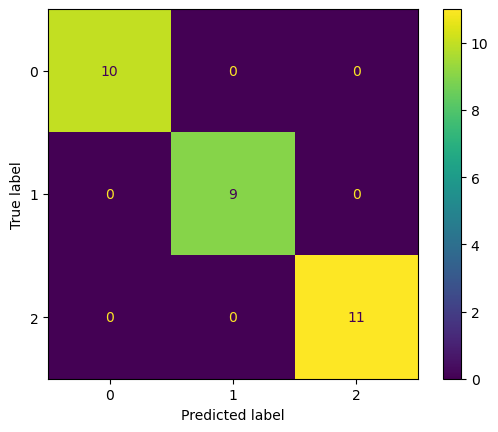

In [54]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [56]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_model.predict(X_test)))


Stacking Classifier Accuracy: 1.0


In [58]:
# 37. Train a Random Forest Classifier and print the top 5 most important features.
clf = RandomForestClassifier().fit(X_train, y_train)
importances = clf.feature_importances_
top_indices = importances.argsort()[-5:][::-1]
print("Top 5 Important Features Indexes:", top_indices)


Top 5 Important Features Indexes: [2 3 0 1]


In [62]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.
from sklearn.metrics import precision_score, recall_score, f1_score

clf = BaggingClassifier(estimator=DecisionTreeClassifier()).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [64]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.
depths = [5, 10, 20, None]
for d in depths:
    clf = RandomForestClassifier(max_depth=d).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f"max_depth={d}, Accuracy={acc}")


max_depth=5, Accuracy=1.0
max_depth=10, Accuracy=1.0
max_depth=20, Accuracy=1.0
max_depth=None, Accuracy=1.0


In [68]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    model = BaggingRegressor(estimator=base, n_estimators=10)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Base Estimator: {type(base).__name__}, MSE: {mean_squared_error(y_test, preds)}")


Base Estimator: DecisionTreeRegressor, MSE: 0.0013333333333333326
Base Estimator: KNeighborsRegressor, MSE: 0.013159999999999998


In [70]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

clf = RandomForestClassifier().fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
y_bin = LabelBinarizer().fit_transform(y_test)
print("ROC-AUC Score:", roc_auc_score(y_bin, y_score, average='weighted', multi_class='ovr'))


ROC-AUC Score: 1.0


In [74]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.model_selection import cross_val_score

clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation scores: [0.95833333 1.         0.79166667 0.95833333 0.95833333]
Mean CV Score: 0.9333333333333333


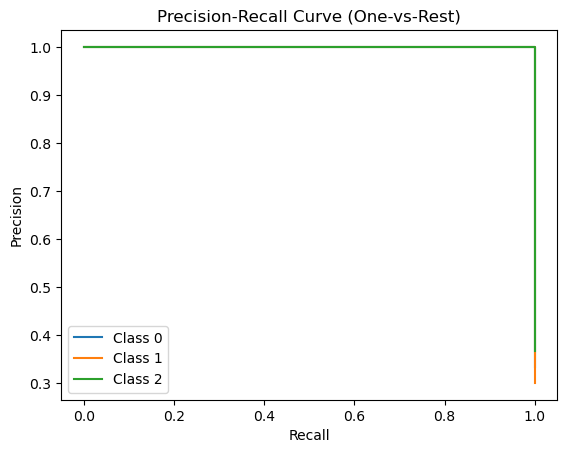

In [80]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve (multiclass-compatible).
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classes = list(set(y_test))
y_test_bin = label_binarize(y_test, classes=classes)
y_score = clf.predict_proba(X_test)

for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f"Class {class_label}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend()
plt.show()


In [82]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
estimators = [
    ('rf', RandomForestClassifier()),
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stack_model.predict(X_test)))


Stacking Accuracy: 1.0


In [86]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
for bootstrap_val in [True, False]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, bootstrap=bootstrap_val)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Bootstrap={bootstrap_val}, MSE={mean_squared_error(y_test, preds)}")


Bootstrap=True, MSE=0.0016666666666666666
Bootstrap=False, MSE=0.0
